In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0 for grade in wine['quality']]

X = wine.drop(['taste','quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=1234)
lr.fit(X_train,y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ',accuracy_score(y_train, y_pred_tr))
print('Test Acc : ',accuracy_score(y_test, y_pred_test))

Train Acc :  0.7377333076775062
Test Acc :  0.7592307692307693


In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.69      0.59      0.64       465
         1.0       0.79      0.86      0.82       835

    accuracy                           0.76      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.75      0.76      0.75      1300



In [5]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, lr.predict(X_test)))

[[273 192]
 [121 714]]


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

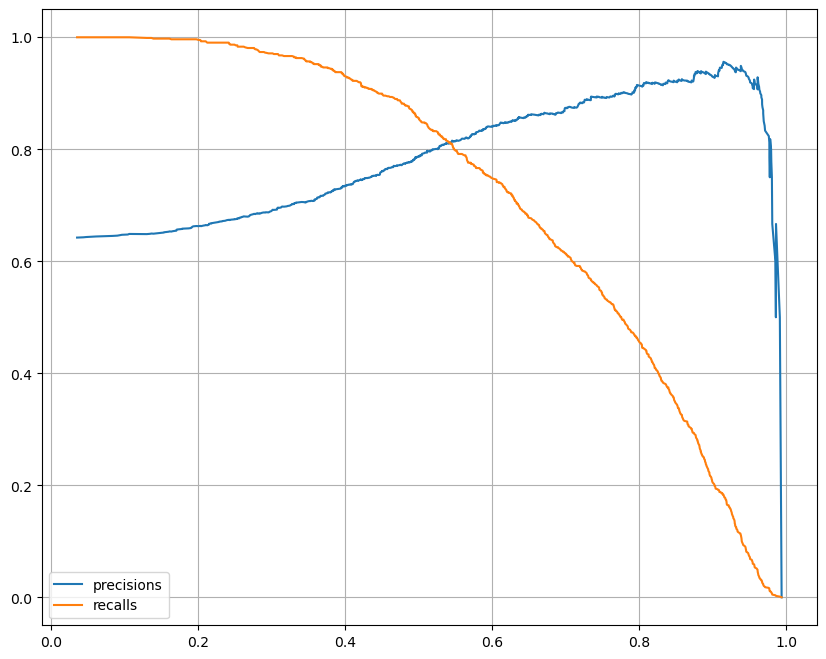

In [7]:
plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:,1]

precisions, recalls, threshold = precision_recall_curve(y_test,pred)
plt.plot(threshold,precisions[:len(threshold)],label='precisions')
plt.plot(threshold,recalls[:len(threshold)],label='recalls')
plt.grid()
plt.legend()
plt.show()

In [8]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.25456759, 0.74543241],
       [0.45522629, 0.54477371],
       [0.1145662 , 0.8854338 ]])

In [9]:
import numpy as np

np.concatenate([pred_proba,y_pred_test.reshape(-1,1)],axis=1)

array([[0.25456759, 0.74543241, 1.        ],
       [0.45522629, 0.54477371, 1.        ],
       [0.1145662 , 0.8854338 , 1.        ],
       ...,
       [0.31757903, 0.68242097, 1.        ],
       [0.22129245, 0.77870755, 1.        ],
       [0.11782979, 0.88217021, 1.        ]])

In [13]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin

array([1., 0., 1., ..., 1., 1., 1.])

In [14]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68       465
         1.0       0.84      0.75      0.79       835

    accuracy                           0.75      1300
   macro avg       0.73      0.75      0.73      1300
weighted avg       0.76      0.75      0.75      1300

